In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


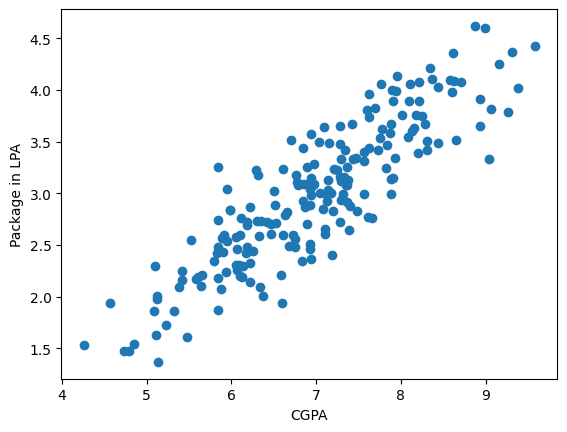

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in LPA")
plt.show()

In [5]:
df.isnull().sum()

,0
cgpa,0
package,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [8]:
# split the data into independent caribale and dependent varibale
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [9]:
# split the data into train and test
# training is for building a model and test for predict and evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2, random_state =101)

In [11]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 1) (40, 1) (160,) (40,)


# Building simple linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
coef = lr.coef_

In [15]:
inter = lr.intercept_

In [17]:
# cgpa = 9.8,7.3 , 6.5
Salary_9_8 = coef*9.8+inter
Salary_9_8

array([4.58171623])

In [20]:
Salary_7_3 = coef*7.3+inter
Salary_7_3

array([3.1597526])

In [22]:
x_test

,cgpa
37,5.90
109,7.77
31,8.10
89,6.42
66,5.11
119,7.39
54,6.86
74,6.85
145,5.84
142,6.93


# prediction

In [24]:
salary_pred = lr.predict(x_test)
salary_pred

array([2.36345297, 3.42708176, 3.61478096, 2.6592214 , 1.91411246,
       3.21094329, 2.909487  , 2.90379914, 2.32932584, 2.94930198,
       3.31332467, 3.88779797, 3.17112831, 3.6716595 , 2.85260845,
       3.71716234, 3.14837689, 3.18250402, 2.54546431, 3.23369471,
       2.94930198, 3.52377529, 3.01186838, 2.12456308, 3.33038823,
       4.45658343, 2.39189224, 3.15406474, 3.06874692, 3.45552103,
       4.09256074, 2.44877078, 3.05168336, 2.49996147, 2.92655056,
       2.96636554, 3.17681616, 2.35776511, 2.39189224, 2.52840075])

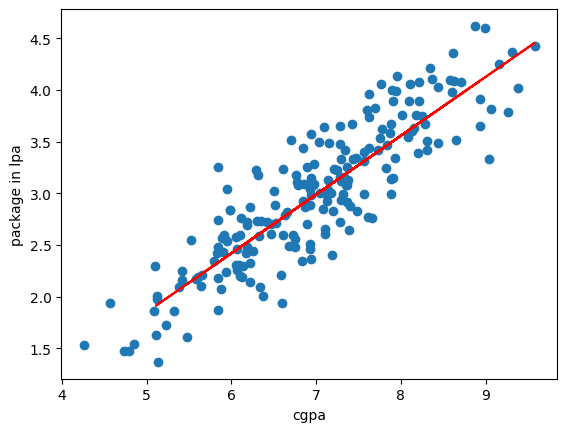

In [26]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test, salary_pred ,color='red')
plt.xlabel('cgpa')
plt.ylabel('package in lpa')
plt.show()

# evaluation

In [27]:
from sklearn.metrics import r2_score

In [29]:
print("Accuracy:", r2_score(y_test,salary_pred))

Accuracy: 0.7368288711522915
